In [2]:
import fastbook
fastbook.setup_book()

/Users/giannicrivello/personal-fastbook/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
from fastai.vision.all import *
from fastbook import *
import fastai

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
sevens = (path/"train"/"7").ls().sorted()
threes = (path/"train"/"3").ls().sorted()

In [5]:
seven_tensors = [tensor(Image.open(i)) for i in sevens]
three_tensors = [tensor(Image.open(i)) for i in threes]

In [6]:
len(seven_tensors)

6265

In [7]:
seven_tensors[0].shape

torch.Size([28, 28])

In [8]:
a = [
    tensor([1,2,3,4]),
    tensor([1,2,3,4]),
    tensor([1,2,3,4])
]
print(len(a))
print(a[0].shape)

3
torch.Size([4])


In [9]:
stacked_a = torch.stack(a)
stacked_a.shape

torch.Size([3, 4])

In [129]:
stacked_threes = torch.stack(three_tensors).float() / 255
stacked_sevens = torch.stack(seven_tensors).float() / 255
print(f"stacked_threes shape: {stacked_threes.shape}")
print(f"stacked_sevens shape: {stacked_sevens.shape}")

NameError: name 'three_tensors' is not defined

<Axes: >

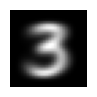

In [11]:
mean_three = stacked_threes.mean(0)
show_image(mean_three, cmap="grey")

<Axes: >

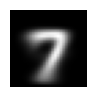

In [12]:
mean_seven = stacked_sevens.mean(0)
show_image(mean_seven, cmap="grey")

In [13]:
test_three = threes[100]
def is_three(img):
    img = tensor(Image.open(img)).float() / 255
    seven_score = abs((mean_seven - img)).mean()
    print(f"seven score: {seven_score}")
    three_score = abs((mean_three - img)).mean()
    print(f"three score: {three_score}")
    if seven_score > three_score:
        return True
    else:
        return False

In [14]:
is_three(test_three)

seven score: 0.16476981341838837
three score: 0.14399386942386627


True

In [15]:
valid_threes = torch.stack([tensor(Image.open(i)) for i in (path/"valid"/"3").ls().sorted()]).float() / 255
valid_sevens = torch.stack([tensor(Image.open(i)) for i in (path/"valid"/"7").ls().sorted()]).float() / 255

In [16]:
def mnist_distance(preds, acts): return (preds - acts).abs().mean((-1, -2))
print(mnist_distance(valid_threes[0], mean_three))
print(mnist_distance(valid_sevens[0], mean_three))

tensor(0.1280)
tensor(0.1537)


In [17]:
mnist_distance(valid_threes, mean_three)

tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260])

In [18]:
def is_3(x): return mnist_distance(x, mean_three) < mnist_distance(x, mean_seven)

In [19]:
accuracy_threes = is_3(valid_threes).float().mean()
accuracy_sevens = (1-is_3(valid_sevens).float()).mean()
accuracy_threes, accuracy_sevens, (accuracy_threes+accuracy_sevens) / 2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [20]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [21]:
train_x.shape

torch.Size([12396, 784])

In [22]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [23]:
dset = list(zip(train_x, train_y))

In [24]:
valid_x = torch.cat([valid_threes, valid_sevens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_threes) + [0]*len(valid_sevens)).unsqueeze(1)

In [25]:
valid_dset = list(zip(valid_x, valid_y))

In [26]:
def init_params(size, std=1.0): return (torch.randn(size)).requires_grad_()

In [27]:
weights = init_params((28*28,1))

In [29]:
weights.shape

torch.Size([784, 1])

In [30]:
bias = init_params(1)

In [31]:
# y=mx+b
(train_x[0]*weights.T).sum() + bias

tensor([-6.2330], grad_fn=<AddBackward0>)

In [32]:
train_x[0].shape, weights.shape

(torch.Size([784]), torch.Size([784, 1]))

In [33]:
train_x[0] @ weights + bias

tensor([-6.2330], grad_fn=<AddBackward0>)

In [34]:
def linear1(x): return x@weights + bias

In [35]:
preds = linear1(train_x)
preds

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

In [36]:
corrects = (preds>0).float() == train_y
accuracy = corrects.float().mean()
accuracy

tensor(0.5380)

In [37]:
def mnist_loss(preds, acts):
    preds = preds.sigmoid()
    return torch.where(acts==1, 1-preds, preds).mean()

In [38]:
data = range(20)
dsl = DataLoader(data, batch_size=5, shuffle=True)

In [39]:
list(dsl)

[tensor([ 7, 17,  5,  9, 15]),
 tensor([19, 11, 10, 13,  2]),
 tensor([12,  0, 18, 16,  3]),
 tensor([ 1,  4,  6, 14,  8])]

In [40]:
weights = init_params((28*28,1))
bias = init_params(1)

In [41]:
weights.shape,bias.shape

(torch.Size([784, 1]), torch.Size([1]))

In [42]:
dl = DataLoader(dset, batch_size=256)

In [43]:
xb, yb = first(dl)

In [44]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [45]:
preds = linear1(train_x[:5])
preds

tensor([[15.7077],
        [18.6850],
        [16.2144],
        [17.4726],
        [18.2625]], grad_fn=<AddBackward0>)

In [46]:
loss = mnist_loss(preds, train_y[:5])

In [47]:
loss.backward()

In [80]:
weights.grad.shape

torch.Size([784, 1])

In [102]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [103]:
def train_epoch(model, params, lr):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()    

In [104]:
def batch_accuracy(preds, acts):
    preds = preds.sigmoid()
    correct = (preds>0.5) == acts
    return correct.float().mean()

In [105]:
def valid_epoch(model):
    accuracy = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accuracy).float().mean().item(), 4)

In [106]:
lr = 0.1
params = (weights, bias)
train_epoch(linear1, params, lr)
valid_epoch(linear1)

0.6152

In [107]:
for _ in range(10):
    train_epoch(linear1, params, lr)
    print(valid_epoch(linear1), end=" ")

0.7353 0.7924 0.8266 0.8554 0.8716 0.8833 0.8976 0.9094 0.9172 0.9212 

In [108]:
linear_model = nn.Linear(28*28,1)

In [114]:
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [116]:
class BasicOptm:
    def __init__(self, params, lr): self.params,self.lr = list(params), lr

    def step(self):
        for p in self.params:
            with torch.no_grad(): p.data -= p.grad*self.lr

    def zero_grad(self):
        for p in self.params:
            with torch.no_grad(): p.grad.zero_()

In [117]:
opt = BasicOptm(linear_model.parameters(), lr)

In [71]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [124]:
def train_model(model, epochs):
    for _ in range(epochs):
        train_epoch(model)
        print(valid_epoch(model), end=" ")

In [125]:
train_model(linear_model, 5)

0.605 0.8755 0.9341 0.9555 0.9624 

In [133]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 5)

0.5615 0.8765 0.9355 0.9531 0.9634 

In [134]:
dls = DataLoaders(dl, valid_dl)

In [143]:
learner = Learner(
    dls, 
    nn.Linear(28*28,1), 
    loss_func=mnist_loss, 
    opt_func=SGD,
    lr=0.1,
    metrics=batch_accuracy
)

In [144]:
learner.fit(n_epoch=5)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.230452,0.374028,0.530422,00:00
1,0.125223,0.186269,0.871933,00:00
2,0.084690,0.108785,0.935231,00:00
3,0.065710,0.080832,0.953386,00:00
4,0.055634,0.067251,0.963199,00:00


In [148]:
simple_nn = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [151]:
learner = Learner(
    dls,
    model=simple_nn,
    loss_func=mnist_loss,
    opt_func=SGD,
    metrics=batch_accuracy
)

In [152]:
learner.fit(n_epoch=5, lr=0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.325672,0.417584,0.504416,00:00
1,0.153408,0.231169,0.802748,00:00
2,0.084088,0.115013,0.917566,00:00
3,0.054664,0.077178,0.941119,00:00
4,0.041098,0.060145,0.956820,00:00


In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
path.ls()

(#3) [Path('/Users/giannicrivello/.fastai/data/mnist_sample/valid'),Path('/Users/giannicrivello/.fastai/data/mnist_sample/labels.csv'),Path('/Users/giannicrivello/.fastai/data/mnist_sample/train')]

In [6]:
train_threes = (path/"train"/"3").ls().sorted()
train_sevens = (path/"train"/"7").ls().sorted()
valid_threes = (path/"valid"/"3").ls().sorted()
valid_sevens = (path/"valid"/"7").ls().sorted()

In [7]:
Image.open(train_threes[0])

In [110]:
threes_data_train = torch.stack([tensor(Image.open(i)) for i in train_threes]).view(-1, 28*28).float() / 255
sevens_data_train = torch.stack([tensor(Image.open(i)) for i in train_sevens]).view(-1, 28*28).float() / 255
threes_data_valid = torch.stack([tensor(Image.open(i)) for i in valid_threes]).view(-1, 28*28).float() / 255
sevens_data_valid = torch.stack([tensor(Image.open(i)) for i in valid_sevens]).view(-1, 28*28).float() / 255

In [111]:
threes_data_train.shape

torch.Size([6131, 784])

In [130]:
x_train = torch.cat([threes_data_train, sevens_data_train])
y_train = tensor([0]*len(threes_data_train) + [1]*len(sevens_data_train)).unsqueeze(1)
x_valid = torch.cat([threes_data_valid, sevens_data_valid])
y_valid = tensor([0]*len(threes_data_valid) + [1]*len(sevens_data_valid)).unsqueeze(1)

In [131]:
dset_train = list(zip(x_train, y_train))
dset_valid = list(zip(x_valid, y_valid))

In [132]:
dls = DataLoader(dset_train, batch_size=256, shuffle=True)
dls_valid = DataLoader(dset_valid, batch_size=256, shuffle=True)

In [133]:
class BasicOptim:
    def __init__(self, params, lr): self.params, self.lr = list(params), lr

    def step(self):
        for p in self.params:
            with torch.no_grad(): p.data -= p.grad*self.lr
                
    def zero_grad(self):
        for p in self.params: 
            with torch.no_grad(): p.grad.zero_()

In [134]:
def mnist_loss(preds, acts):
    preds = preds.sigmoid()
    return torch.where(acts==1, 1-preds, preds).mean()

In [135]:
def calc_grads(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()
    return loss

In [136]:
def train_epoch(model):
    for xb, yb in dls:
        loss = calc_grads(xb, yb, model)
        opt.step()
        # opt.zero_grad()
    print(f"loss for epoch; {loss.mean().item()}")

In [137]:
def batch_accuracy(preds, acts):
    preds = preds.sigmoid()
    correct = (preds>0.5) == acts
    return correct.float().mean()

In [138]:
def valid_epoch(model):
    accuracy = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accuracy).float().mean().item(), 4)

In [139]:
def train_model(model, epochs):
    for _ in range(epochs):
        train_epoch(model)
        print(valid_accuracy(model), end=" ")

In [140]:
linear_model = nn.Linear(28*28,1)
lr=.1
opt = BasicOptim(linear_model.parameters(), lr)

In [141]:
train_model(linear_model, 10)

loss for epoch; 0.0475819855928421
0.9666 loss for epoch; 0.02777750790119171
0.9686 loss for epoch; 0.01852165162563324
0.9686 loss for epoch; 0.047687508165836334
0.9696 loss for epoch; 0.00943410862237215
0.9695 loss for epoch; 0.046263113617897034
0.9696 loss for epoch; 1.664169569302343e-31
0.9694 loss for epoch; 0.018518518656492233
0.9701 loss for epoch; 0.02777777798473835
0.9701 loss for epoch; 0.01884135976433754
0.9696 

In [142]:
dls = DataLoaders(dls, dls_valid)

In [143]:
learner = Learner(
    dls, 
    nn.Linear(28*28,1), 
    loss_func=mnist_loss, 
    opt_func=SGD,
    lr=0.1,
    metrics=batch_accuracy
)

In [144]:
learner.fit(n_epoch=5)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.154831,0.094465,0.966143,00:00
1,0.098931,0.070071,0.967615,00:00
2,0.075355,0.060304,0.968597,00:00
3,0.062390,0.054702,0.969087,00:00
4,0.054759,0.050898,0.969087,00:00
